# Model Training

Importing all the important libraries and moduels

In [1]:
# Basic Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Fixed typo in function names: mean_squared_erroe to mean_squared_error and r2_error to r2_score
from sklearn.neighbors import KNeighborsRegressor # Fixed typo: skleran to sklearn and kneighborsRegressor to KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Loading the Data

In [2]:
df = pd.read_csv('Data/stud.csv')

Show Top 5 recod

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y variables

In [4]:
X = df.drop(columns=['math_score'],axis = 1)

In [5]:
y = df['math_score']

In [6]:
# Create Column transformer with 3 type of transformers

num_feature = X.select_dtypes(exclude = "object").columns
cat_feature = X.select_dtypes(include = "object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_feature),
        ("StandardScaler", numeric_transformer, num_feature)
    ]
)

In [7]:
X = preprocessor.fit_transform(X)

In [8]:
X.shape

(1000, 19)

In [9]:
from sklearn.model_selection import train_test_split
# Seperate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

Create an evaluation method to give all metics after model training

In [10]:
def evaluate_model(true, predicted):
  mae = mean_absolute_error(true, predicted)
  mse = mean_squared_error(true, predicted)
  rmse = np.sqrt(mean_squared_error(true, predicted))
  r2_square = r2_score(true, predicted)
  return mae, rmse, r2_square

In [11]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbour Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoosting Regressor" : CatBoostRegressor(verbose=False),
    "AdaBoost Regressor" : AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(X_train, y_train)

  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

  model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

  print(list(models.keys())[i])
  model_list.append((list(models.keys()))[i])

  print("Model performance for training set")
  print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
  print("- R2 Score: {:.4f}".format(model_train_r2))
  print("-" * 35)

  print("Model performance for test set")
  print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
  print("- R2 Score: {:.4f}".format(model_test_r2))
  print("-" * 35)
  r2_list.append(model_test_r2)
  print('\n')

Linear Regression
Model performance for training set
- Root Mean Squared Error: 5.3273
- Mean Absolute Error: 4.2787
- R2 Score: 0.8741
-----------------------------------
Model performance for test set
- Root Mean Squared Error: 5.4096
- Mean Absolute Error: 4.2259
- R2 Score: 0.8797
-----------------------------------


Lasso
Model performance for training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
-----------------------------------
Model performance for test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253
-----------------------------------


Ridge
Model performance for training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
-----------------------------------
Model performance for test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806
-----------------------------------


K-Neighbour Regressor
Model performance for training

In [13]:
pd.DataFrame(list(zip(model_list, r2_list)),columns = ['Model name','R2 Score']).sort_values(by=["R2 Score"],ascending = False)

,Model name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.879740
8,AdaBoost Regressor,0.858963
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.851433
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbour Regressor,0.783898
4,Decision Tree,0.740156


Linear Regression

In [14]:
lin_model = LinearRegression(fit_intercept = True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred) * 100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.97


Plot y_pred and y_test

Text(0, 0.5, 'predicted')

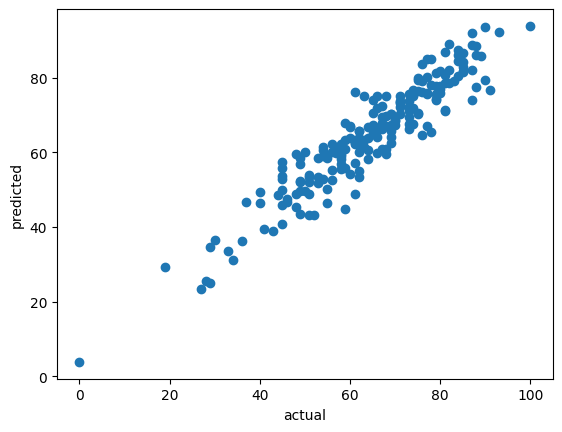

In [15]:
plt.scatter(y_test, y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')

<Axes: xlabel='math_score'>

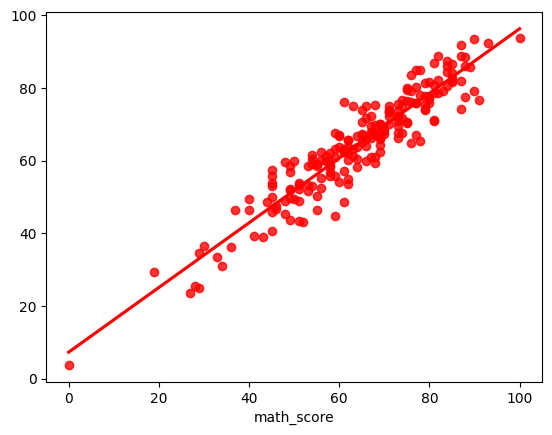

In [16]:
sns.regplot(x=y_test, y=y_pred,ci=None, color='red')

Differnece between Actual and Predicted values

In [17]:
pred_df = pd.DataFrame({'Actual value':y_test,'predicted value':y_pred,'differnece':y_test - y_pred})
pred_df

,Actual value,predicted value,differnece
521,91,76.703125,14.296875
737,53,58.578125,-5.578125
740,80,76.828125,3.171875
660,74,76.734375,-2.734375
411,84,87.484375,-3.484375
...,...,...,...
408,52,43.125000,8.875000
332,62,62.109375,-0.109375
208,74,67.562500,6.437500
613,65,67.328125,-2.328125
